<a href="https://www.kaggle.com/code/martinab/classifying-iris-species?scriptVersionId=113837545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classifying Iris Species

Let's assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimetres. <br>
<br>
She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. Let's assume that these are the only species our hobby botanist will encounter in the wild. <br>
<br>
Attribute Information: <br>

1. sepal length in cm <br>
2. sepal width in cm <br>
3. petal length in cm <br>
4. petal width in cm <br>
5. class: <br>
-- Iris Setosa <br>
-- Iris Versicolour <br>
-- Iris Virginica <br>

<img src='https://images.fineartamerica.com/images/artworkimages/mediumlarge/3/spanish-iris-illustration-1827-r1-botany.jpg' width=450 align='center'/>

The botanist wants to use existing data for iris species to classify ireses she finds. In this project we will be using a simple classification algorithm called K-Nearest Neighbor. 

## Importing libraries

In [1]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotly:
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Loading the Data

In [2]:
# Importing and loading the iris dataset
iris = pd.read_csv('../input/Iris.csv')

In [3]:
# Show first 5 rows of dataset:
header = ff.create_table(iris.head())

header.show()

In [4]:
# Check unique values for Species:
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


There are three iris species in this dataset: setosa, versicolor and virginica. The dataset consists of 6 columns called: Id, SepalLengthCm, SepalWidthCm, PetalLengthCM, PetalWidthCm and Species.

Each row represents one sample (iris flower), four columns for Sepal&Petal represent measuremnets. Species columns specifie what iris class. Id column is not needed and we can drop it. 

In [5]:
# Function to describe variables
def desc(df):
    d = pd.DataFrame(df.dtypes,columns=['Data Types'])
    d = d.reset_index()
    d['Columns'] = d['index']
    d = d[['Columns','Data Types']]
    d['Missing'] = df.isnull().sum().values    
    d['Uniques'] = df.nunique().values
    return d


descr = ff.create_table(desc(iris))

descr.show()

We can see from the table above, that we have no missing values, and that the lenght of dataset is 150 rows/samples.

## Exploratory Data Analysis (EDA) 

In the following section we will use Exploratory Data Analysis (EDA) to find out more about iris dataset via data visualisation. It's a good practice to get to know your data before applying machine learning algorithms. 

In [6]:
# Distritution of Species:

s_df = pd.DataFrame(iris.groupby(['Species'])['Species'].count())

data=go.Bar(x = s_df.index
           , y = s_df.Species
           ,  marker=dict( color=['#0e9aa7', '#f6cd61', '#fe8a71'])
           )



layout = go.Layout(title = 'Distribution of Iris Species'
                   , xaxis = dict(title = 'Species')
                   , yaxis = dict(title = 'Volume')
                  )

fig = go.Figure(data,layout)
fig.show()

In [7]:
s_df = s_df.rename(columns = {"Species":"Volume"}).reset_index()
s_df

,Species,Volume
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


The iris dataset contains 50 samples (rows) for each of the species. Dataset is perfectly balanced :)

### Histograms

In [8]:
# Create a dataset for each of the species:
setosa = iris[iris.Species == 'Iris-setosa']
versicolor = iris[iris.Species == 'Iris-versicolor']
virginica = iris[iris.Species == 'Iris-virginica']

# Histogram data for Sepal Length
hist_data  = [setosa.SepalLengthCm, versicolor.SepalLengthCm, virginica.SepalLengthCm]

group_labels = ['setosa', 'versicolor', 'virginica']
colors = ['#0e9aa7', '#f6cd61', '#fe8a71']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.1, show_rug=False)
# Add title
fig.update_layout(title_text='Histogram for Sepal Length'
                  , xaxis = dict(title = 'lenght (cm)')
                  , yaxis = dict(title = 'count')
                 )


fig.show()

In [9]:
# Histogram data for Sepal Width

hist_data  = [setosa.SepalWidthCm, versicolor.SepalWidthCm, virginica.SepalWidthCm]

group_labels = ['setosa', 'versicolor', 'virginica']
colors = ['#0e9aa7', '#f6cd61', '#fe8a71']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.1, show_rug=False)
# Add title
fig.update_layout(title_text='Histogram for Sepal Width'
                  , xaxis = dict(title = 'width (cm)')
                  , yaxis = dict(title = 'count')
                 )

fig.show()


In [10]:
# Histogram data for Petal Length

hist_data  = [setosa.PetalLengthCm, versicolor.PetalLengthCm, virginica.PetalLengthCm]

group_labels = ['setosa', 'versicolor', 'virginica']
colors = ['#0e9aa7', '#f6cd61', '#fe8a71']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.1, show_rug=False)
# Add title
fig.update_layout(title_text='Histogram for Petal Length'
                  , xaxis = dict(title = 'lenght (cm)')
                  , yaxis = dict(title = 'count')
                 )

fig.show()

In [11]:
# Histogram data for Petal Width

hist_data  = [setosa.PetalWidthCm, versicolor.PetalWidthCm, virginica.PetalWidthCm]

group_labels = ['setosa', 'versicolor', 'virginica']
colors = ['#0e9aa7', '#f6cd61', '#fe8a71']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.1, show_rug=False)
# Add title
fig.update_layout(title_text='Histogram for Petal Width'
                  , xaxis = dict(title = 'width (cm)')
                  , yaxis = dict(title = 'count')
                 )

fig.show()


We can see that we can clearly distinguish setosa species according to it's petal parameters. Virginica and versicolor parameters are overlaping.

### Scatter Plots

In this section we will plot data specifically for Sepal(length&width) and Petal(length&width). We can find all scatter plot combinations on Scatterplot Metrics visualisation.

In [12]:
# Scattergraph for Iris Sepal (length vs width):

fig = go.Figure()

fig.add_trace(go.Scatter(
      x=setosa.SepalLengthCm
    , y=setosa.SepalWidthCm
    , name='setosa'
    , mode='markers'
    , marker_color='#0e9aa7'
))

fig.add_trace(go.Scatter(
      x=versicolor.SepalLengthCm
    , y=versicolor.SepalWidthCm
    , name='versicolor'
    , mode='markers'
    , marker_color='#f6cd61'
))

fig.add_trace(go.Scatter(
      x=virginica.SepalLengthCm
    , y=virginica.SepalWidthCm
    , name='virginica'
    , mode='markers'
    , marker_color='#fe8a71'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers'
                 # , marker_line_width=2
                  , marker_size=10)

fig.update_layout(title='Iris Sepal (length vs width)'
                  , xaxis = dict(title = 'length (cm)')
                  , yaxis = dict(title = 'width (cm)')
                 )


fig.show()

In [13]:
# Scattergraph for Iris Petal (length vs width):

fig = go.Figure()

fig.add_trace(go.Scatter(
      x=setosa.PetalLengthCm
    , y=setosa.PetalWidthCm
    , name='setosa'
    , mode='markers'
    , marker_color='#0e9aa7'
))

fig.add_trace(go.Scatter(
      x=versicolor.PetalLengthCm
    , y=versicolor.PetalWidthCm
    , name='versicolor'
    , mode='markers'
    , marker_color='#f6cd61'
))

fig.add_trace(go.Scatter(
      x=virginica.PetalLengthCm
    , y=virginica.PetalWidthCm
    , name='virginica'
    , mode='markers'
    , marker_color='#fe8a71'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers'
                 # , marker_line_width=2
                  , marker_size=10)

fig.update_layout(title='Iris Petal (length vs width)'
                  , xaxis = dict(title = 'length (cm)')
                  , yaxis = dict(title = 'width (cm)')
                 )


fig.show()

### Scatterplot Matrix

For creating Scatterplot Matrix, we used seaborn visualisation instead od plotly. The colours for species are consistent throuhout this project.

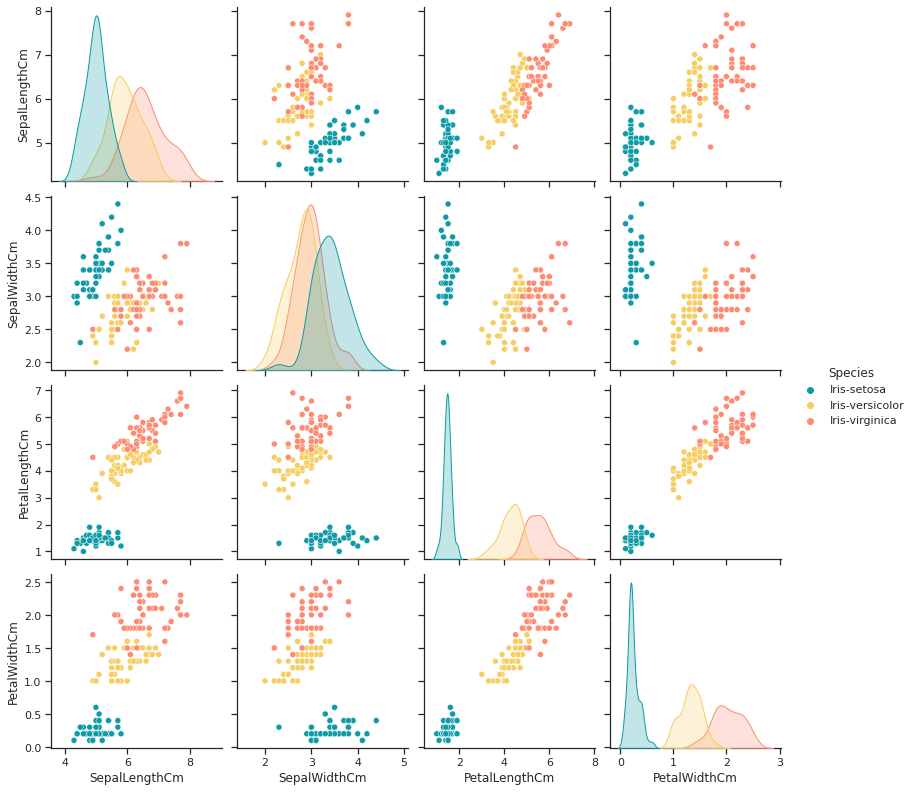

In [14]:
# Plotting the features of our dataset (this gives us density graphs and scatter plots): 

columns = list(iris.columns)[1:] # remove id column

sns.set(style="ticks")
sns.pairplot(iris[columns]
             , hue='Species'
             , palette=['#0e9aa7', '#f6cd61', '#fe8a71']
             , diag_kind = 'kde'
             , height = 2.8)
plt.show()

### Box Plots

Please find below box plots for Sepal and Petal dimensions: 

In [15]:
# Box plot for Sepal Length:

fig = go.Figure()
fig.add_trace(go.Box(y=setosa.SepalLengthCm, name='setosa', marker_color='#0e9aa7'))
fig.add_trace(go.Box(y=virginica.SepalLengthCm, name='virginica', marker_color='#fe8a71'))
fig.add_trace(go.Box(y=versicolor.SepalLengthCm, name = 'versicolor',  marker_color='#f6cd61'))

fig.update_layout(title='Sepal Length'
                  , xaxis = dict(title = 'species')
                  , yaxis = dict(title = 'length (cm)')
                 )

fig.show()

In [16]:
# Box plot for Sepal Width:

fig = go.Figure()
fig.add_trace(go.Box(y=setosa.SepalWidthCm, name='setosa', marker_color='#0e9aa7'))
fig.add_trace(go.Box(y=virginica.SepalWidthCm, name='virginica', marker_color='#fe8a71'))
fig.add_trace(go.Box(y=versicolor.SepalWidthCm, name = 'versicolor',  marker_color='#f6cd61'))

fig.update_layout(title='Sepal Width'
                  , xaxis = dict(title = 'species')
                  , yaxis = dict(title = 'length (cm)')
                 )

fig.show()

In [17]:
# Box plot for Petal Length:

fig = go.Figure()
fig.add_trace(go.Box(y=setosa.PetalLengthCm, name='setosa', marker_color='#0e9aa7'))
fig.add_trace(go.Box(y=virginica.PetalLengthCm, name='virginica', marker_color='#fe8a71'))
fig.add_trace(go.Box(y=versicolor.PetalLengthCm, name = 'versicolor',  marker_color='#f6cd61'))

fig.update_layout(title='Petal Length'
                  , xaxis = dict(title = 'species')
                  , yaxis = dict(title = 'length (cm)')
                 )

fig.show()

In [18]:
# Box plot for Petal Width:

fig = go.Figure()
fig.add_trace(go.Box(y=setosa.PetalWidthCm, name='setosa', marker_color='#0e9aa7'))
fig.add_trace(go.Box(y=virginica.PetalWidthCm, name='virginica', marker_color='#fe8a71'))
fig.add_trace(go.Box(y=versicolor.PetalWidthCm, name = 'versicolor',  marker_color='#f6cd61'))

fig.update_layout(title='Sepal Width'
                  , xaxis = dict(title = 'species')
                  , yaxis = dict(title = 'length (cm)')
                 )

fig.show()

### Parallel Coordinates

In [19]:
# Create Parallel Coordinates:

def spc_id(i):    
    if i == 'Iris-setosa':
        return 1
    elif i == 'Iris-versicolor':
        return 2
    else:
        return 3

iris['species_id'] = iris['Species'].apply(spc_id)
iris = iris.drop('Id', axis = 1)


fig = px.parallel_coordinates(iris
                              , color='species_id'
                              , labels={'species_id':'Species'
                                        ,'SepalWidthCm':'Sepal Width'
                                        ,'SepalLengthCm':'Sepal Length'
                                        ,'PetalWidthCm':'Petal Width'
                                        ,'PetalLengthCm':'Petal Length'}
                              , color_continuous_scale = ['#0e9aa7', '#f6cd61', '#fe8a71']
                              , color_continuous_midpoint=2                           
                             )
fig.show()

As we mentioned previously color is consistent for species throuhgout the notebook. To make it easy to read the species key is as follows:
 - 1 setosa
 - 2 versicolor
 - 3 virginica

## Training and testing data

For performing machine learning we split data into to parts: test and train. Test size represents 20% of the whole iris dataset. 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Defining target set y, and a training set X:
y = iris.Species
X = iris.drop(['Species','species_id'], axis = 1)

# Split data into train and test part:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Building the model: K-Nearest Neighbors

In [22]:
# The most important parameter of k-Nearest Neighbors classifier is the number of neighbors, which we will set to 17:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17)

In [23]:
# Fitting the data with knn model:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

### Evaluating the model 

We will now evaluate our model by using classification report and confusion matrix:

In [24]:
# Using the predict method on KNN to predict values for X_test:
y_pred = knn.predict(X_test)

In [25]:
print('Test set score {:.2f}'.format(knn.score(X_test,y_test)))

Test set score 0.97


In [26]:
# Importing classification_method and confusion_matrix:
from sklearn.metrics import classification_report, confusion_matrix

**Classification report**

In [27]:
# Printing out classification report:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Confusion matrix**

In [28]:
z = confusion_matrix(y_test, y_pred)

x = ['setosa', 'versicolor', 'virginica']
y = ['setosa', 'versicolor', 'virginica']

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Portland')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

### Model Improvement  - choosing the best K-value


Let's have a look at model performance when using different values of k by using Error Rate.

In [29]:
# Creating a for loop that trains various KNN models with different K values:
# Keeping a track of the error_rate for each of these models with a list
error_rate = []

for i in range(1,50,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [30]:
# Line graph for k vs. error rate:

x = list(range(1,50,2))

fig = go.Figure()
fig.add_trace(go.Scatter(x=x
                         , y=error_rate
                         , mode='lines'
                         , name='Error Rate line'
                        )
             )

fig.add_trace(go.Scatter(x=x
                         , y=error_rate
                         , mode='markers'
                         , name='Error Rate point'
                        )
             )

fig.update_layout(title='Line graph for K value vs. Error Rate'
                  , xaxis_title='K'
                  , yaxis_title='Error Rate'
                 )

fig.show()

### Retraining the Model with new K-value
 

As we can see above, the model performs deffirently for different values of k. But the question is, how to select the right value of K? 

First at all we will use odd value for K. The reason for this is that it can happen that for K=4 we have two points from class 1 and two points from class 2. What should we do in this case to go for class 1 or class 2? Since we have 3 species (target classes) we will also avoid multiples of 3 as K values.

If K value is too low, it will cause overfitting and value too high will underfit.

In [31]:
# Using brute force to find best value for K:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_scores = []
neighbors = list(np.arange(1,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100

print("The accuracy for optimal K = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal K = 5 using brute is 100.0


Optimal value for K = 5.

**Retrain and print classification report**

In [32]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')

print(classification_report(y_test,pred))

WITH K=5


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Decision Boundaries**

The decision boundaries, are shown on the graph below.

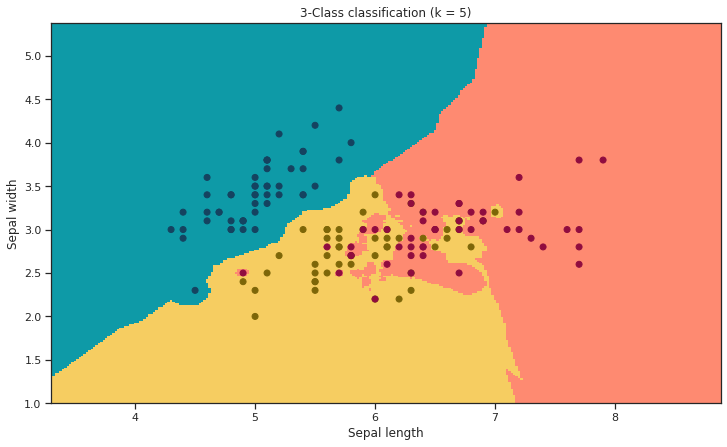

In [33]:
# Graph for Decision Boundaries

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# prepare data
X=iris.values[:, :2]
y=iris.species_id
h = .02

# Create color maps
cmap_light = ListedColormap(['#0e9aa7', '#f6cd61', '#fe8a71'])
cmap_bold = ListedColormap(['#154360', '#7D6608', '#900C3F'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


**Confusion matrix**

In [34]:
z = confusion_matrix(y_test, pred)

x = ['setosa', 'versicolor', 'virginica']
y = ['setosa', 'versicolor', 'virginica']

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Portland')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()